In [41]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

base_filename = "demooo" #more_data #generalization_max_1000 #generalization #normalize #encoding 
base_path_results = "./out/" + base_filename + "/data/"
max_experiments = 10

def find_filename(base_path_results):
    i = 1
    while True:
        file_name = base_path_results + "out_{}.csv".format(i)
        if not os.path.exists(file_name):
            return i-1
        i += 1

run_id = find_filename(base_path_results)
vector_data = []
vector_size = min(max_experiments, run_id)
vector_size = 1 if vector_size <= 0 else vector_size
print("Run ID: ", run_id)
print("Vector Size: ", vector_size)


for i in range(run_id - vector_size, run_id):
    tmp_name = base_path_results + "out_{}.csv".format(i+1)
    tmp_data = pd.read_csv(tmp_name)
    vector_data.append(tmp_data)

Run ID:  2
Vector Size:  2


In [42]:
selected_indexes = [] #6,7,8,9,10

In [43]:
base_path_data = "data/"
folder_name = "m_4_r_3"

x = np.load(base_path_data + folder_name + "/exact_politopes_x.npy", allow_pickle=True)
y = np.load(base_path_data + folder_name + "/exact_politopes_y.npy", allow_pickle=True)


print("Mean: ", np.mean(y))
print("Std: ", np.std(y))
print("Std squared: ", np.mean(np.std(y)**2))

Mean:  251.6313172081867
Std:  144.3172390842364
Std squared:  20827.465496896653


In [ ]:
#Best values for each run

best_run_index = 0
result_best_run = float("inf")

for i in range(len(vector_data)):
    print("Run: ", run_id - i)
    
    #Get the index of the lowest value for the "dev_mse" column
    index_lowest = vector_data[i]["mae_dev"].idxmin()
    if vector_data[i]["mae_dev"].iloc[index_lowest] < result_best_run:
        result_best_run = vector_data[i]["mae_dev"].iloc[index_lowest]
        best_run_index = i
    
    print("Mean absolute error train: ", vector_data[i]["mae_train"].iloc[index_lowest])
    print("Mean absolute error dev: ", vector_data[i]["mae_dev"].iloc[index_lowest])
    print("Mean absolute error test: ", vector_data[i]["mae_test"].iloc[index_lowest])
    
    print("\nMean relative error train: ", vector_data[i]["mre_train"].iloc[index_lowest])
    print("Mean relative error dev: ", vector_data[i]["mre_dev"].iloc[index_lowest])
    print("Mean relative error test: ", vector_data[i]["mre_test"].iloc[index_lowest])
    
    print("\n-----------------------------------\n")

print("Best run: ", best_run_index + 1)

Run:  2
Mean absolute error train:  125.13189650058746
Mean absolute error dev:  124.20695891439917
Mean absolute error test:  125.010522672832

Mean relative error train:  2.1983534785097705
Mean relative error dev:  2.9039706012497946
Mean relative error test:  6.137486773477434

-----------------------------------

Run:  1
Mean absolute error train:  50.71772597789764
Mean absolute error dev:  108.77070572435856
Mean absolute error test:  97.44257851094008

Mean relative error train:  0.2370266284125257
Mean relative error dev:  0.5634536243769022
Mean relative error test:  0.7384960997276901

-----------------------------------

Best run:  1


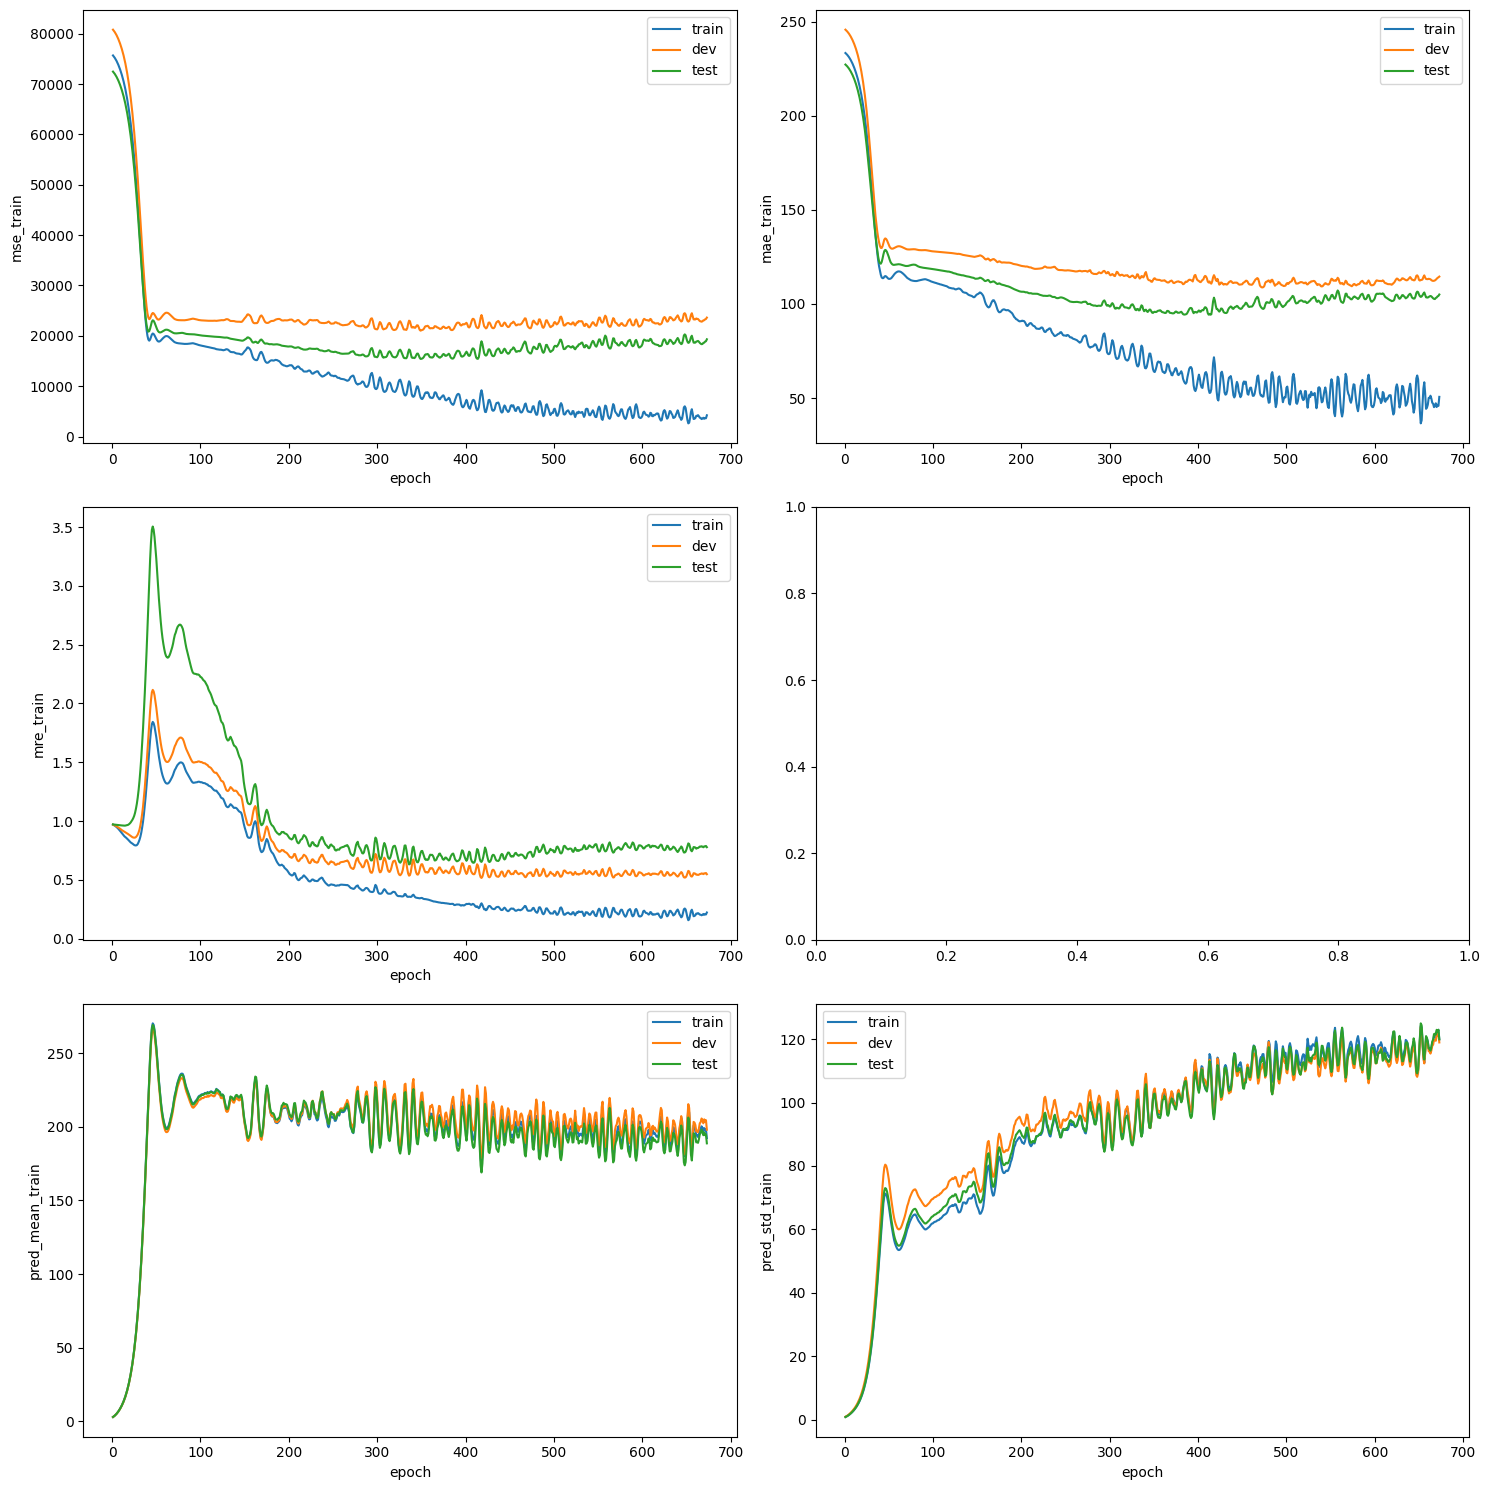

In [45]:
#Best run results
figure2, ax2 = plt.subplots(3, 2, figsize=(15, 15))

sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mse_train", ax=ax2[0, 0], label="train")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mse_dev", ax=ax2[0, 0], label="dev")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mse_test", ax=ax2[0, 0], label="test")

sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mae_train", ax=ax2[0, 1], label="train")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mae_dev", ax=ax2[0, 1], label="dev")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mae_test", ax=ax2[0, 1], label="test")

sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mre_train", ax=ax2[1, 0], label="train")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mre_dev", ax=ax2[1, 0], label="dev")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="mre_test", ax=ax2[1, 0], label="test")

sns.lineplot(data=vector_data[best_run_index], x="epoch", y="pred_mean_train", ax=ax2[2, 0], label="train")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="pred_mean_dev", ax=ax2[2, 0], label="dev")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="pred_mean_test", ax=ax2[2, 0], label="test")

sns.lineplot(data=vector_data[best_run_index], x="epoch", y="pred_std_train", ax=ax2[2, 1], label="train")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="pred_std_dev", ax=ax2[2, 1], label="dev")
sns.lineplot(data=vector_data[best_run_index], x="epoch", y="pred_std_test", ax=ax2[2, 1], label="test")

figure2.tight_layout()

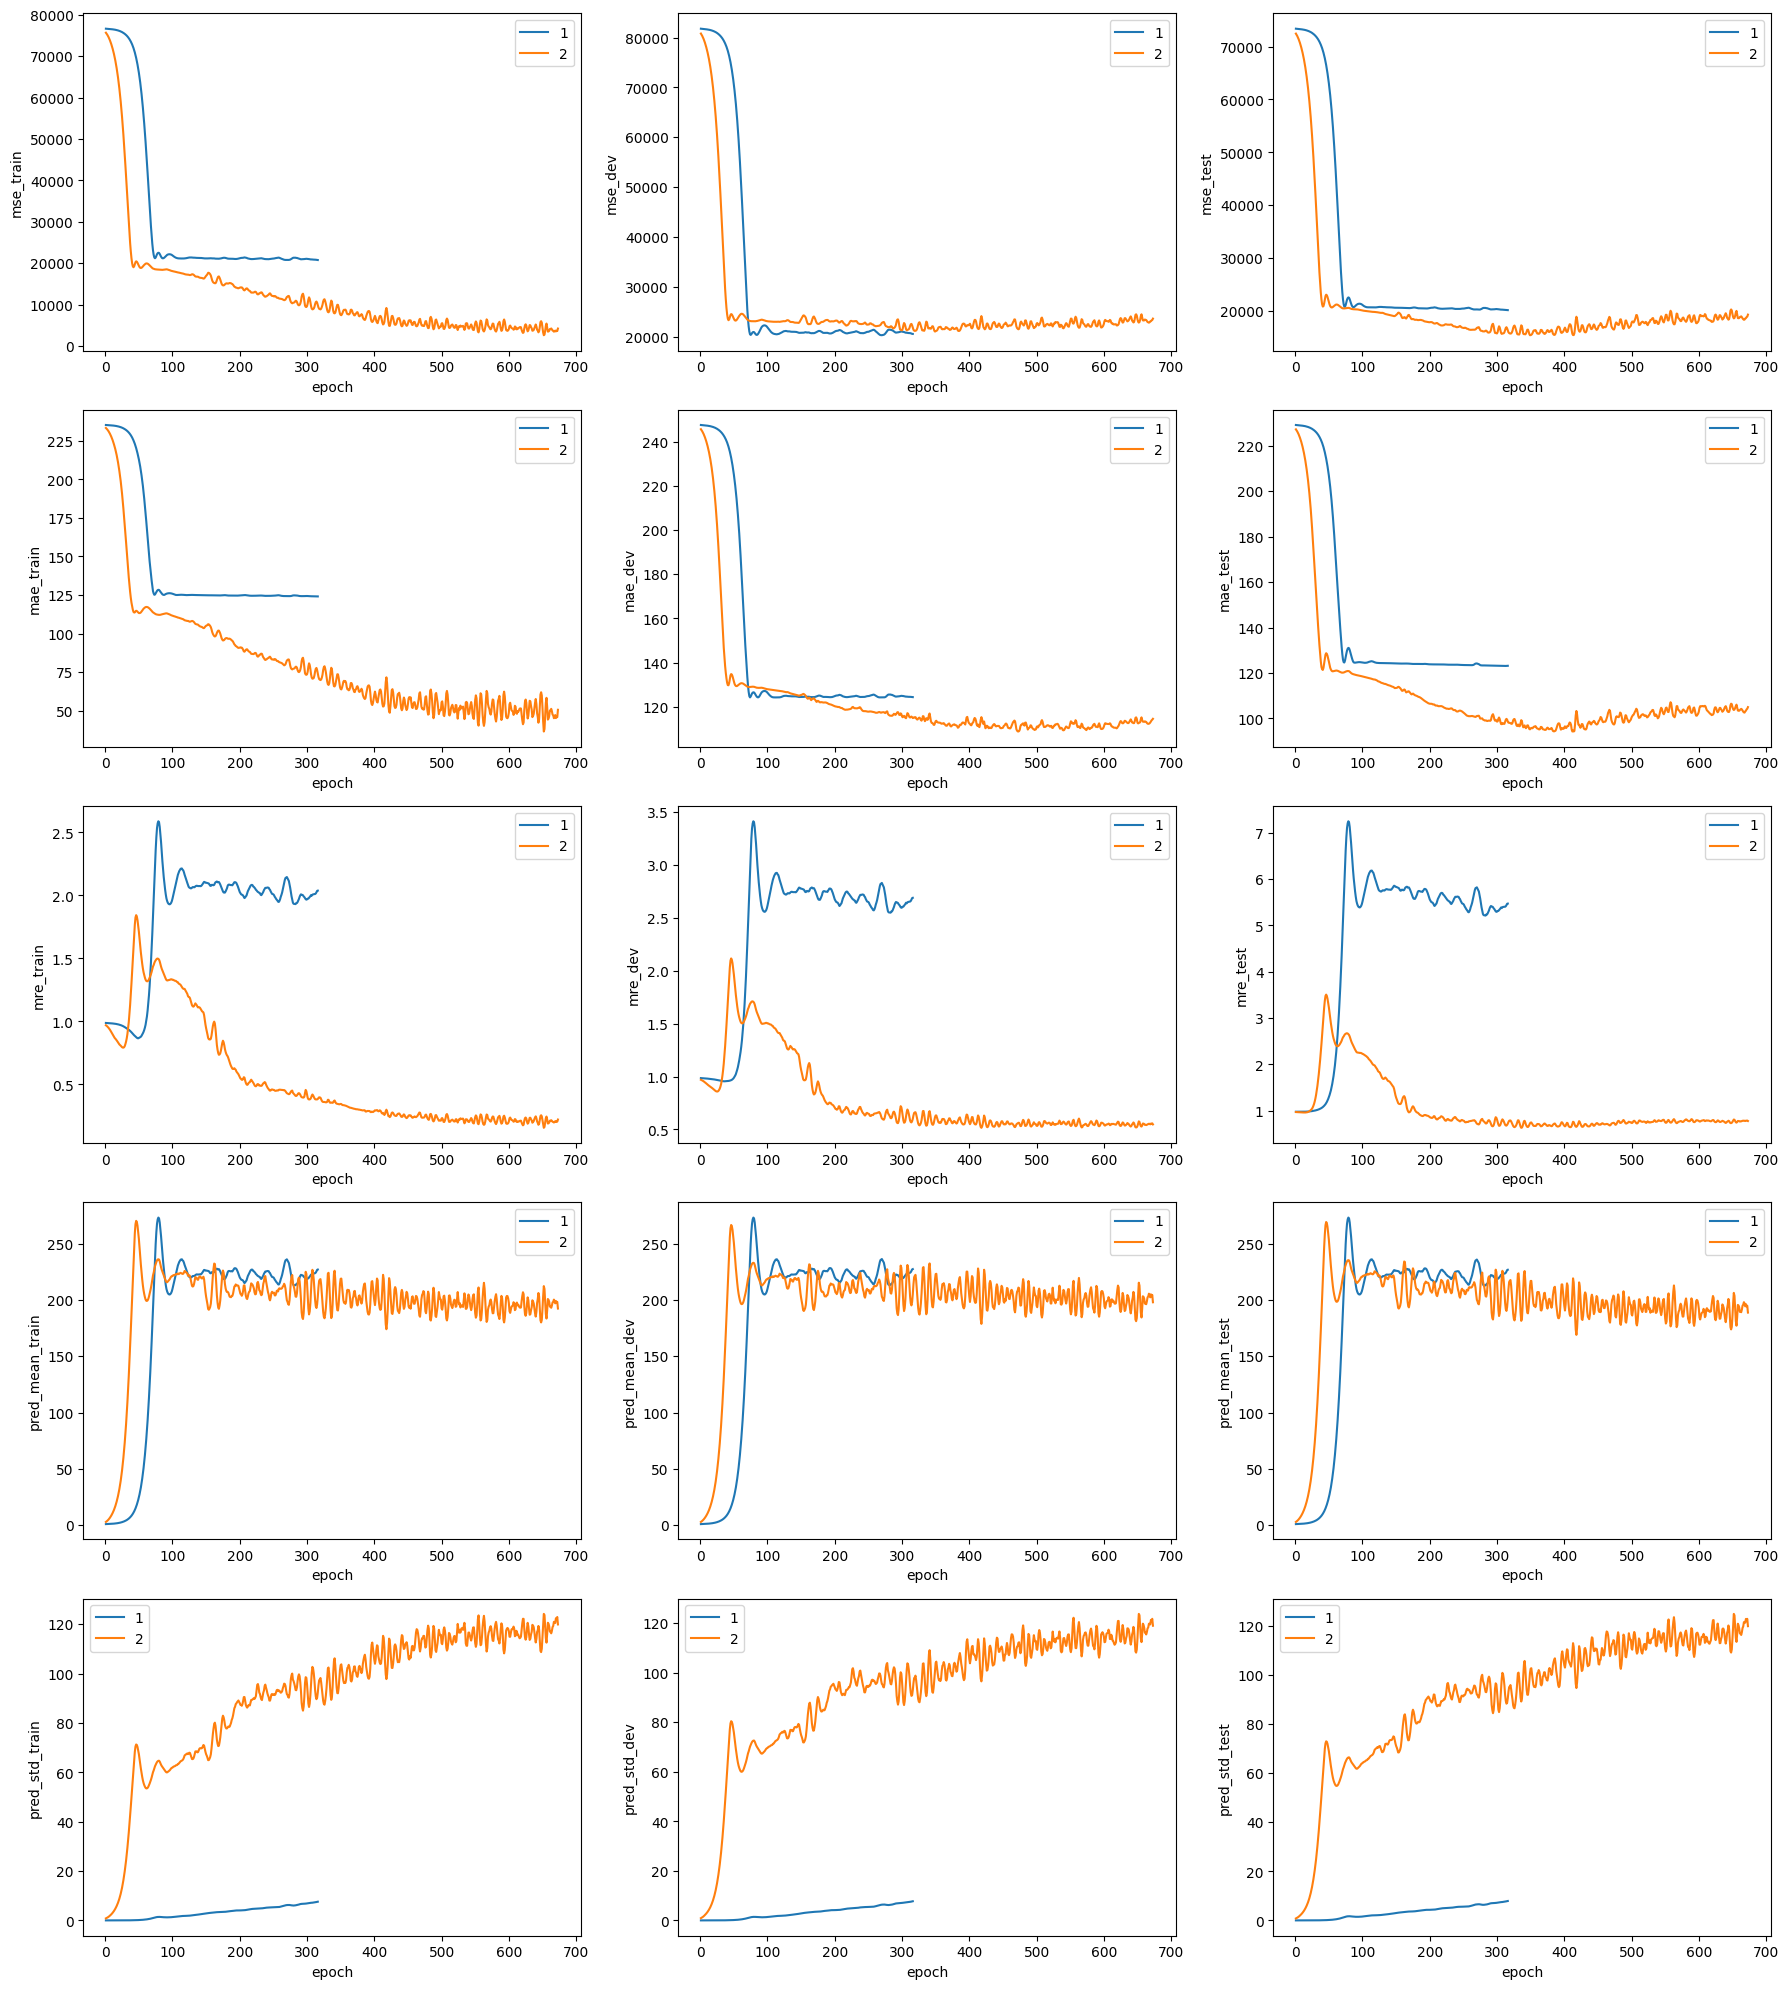

In [46]:
figure2, ax2 = plt.subplots(5, 3, figsize=(18, 20))

for i in range(len(vector_data)):
    
    if selected_indexes != []:
        if i+1 not in selected_indexes:
            continue
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mse_train", ax=ax2[0, 0], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mse_dev", ax=ax2[0, 1], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mse_test", ax=ax2[0, 2], label=i + 1)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mae_train", ax=ax2[1, 0], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mae_dev", ax=ax2[1, 1], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mae_test", ax=ax2[1, 2], label=i + 1)
    
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mre_train", ax=ax2[2, 0], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mre_dev", ax=ax2[2, 1], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mre_test", ax=ax2[2, 2], label=i + 1)
    
    
    sns.lineplot(data=vector_data[i], x="epoch", y="pred_mean_train", ax=ax2[3, 0], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="pred_std_train", ax=ax2[4, 0], label=i + 1)

    sns.lineplot(data=vector_data[i], x="epoch", y="pred_mean_dev", ax=ax2[3, 1], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="pred_std_dev", ax=ax2[4, 1], label=i + 1)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="pred_mean_test", ax=ax2[3, 2], label=i + 1)
    sns.lineplot(data=vector_data[i], x="epoch", y="pred_std_test", ax=ax2[4, 2], label=i + 1)

figure2.tight_layout()

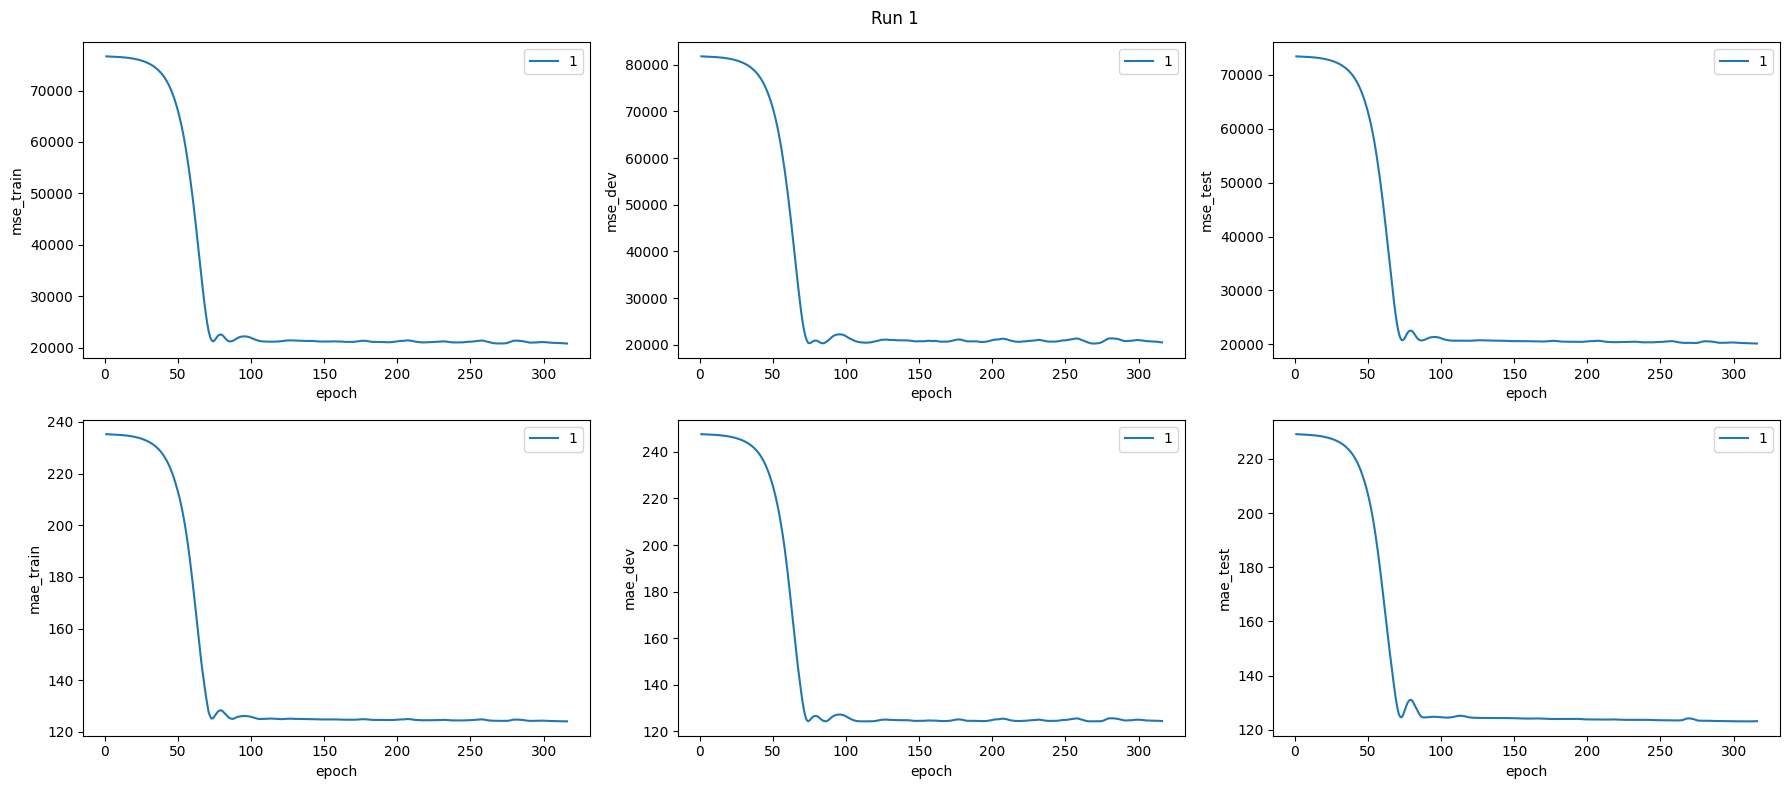

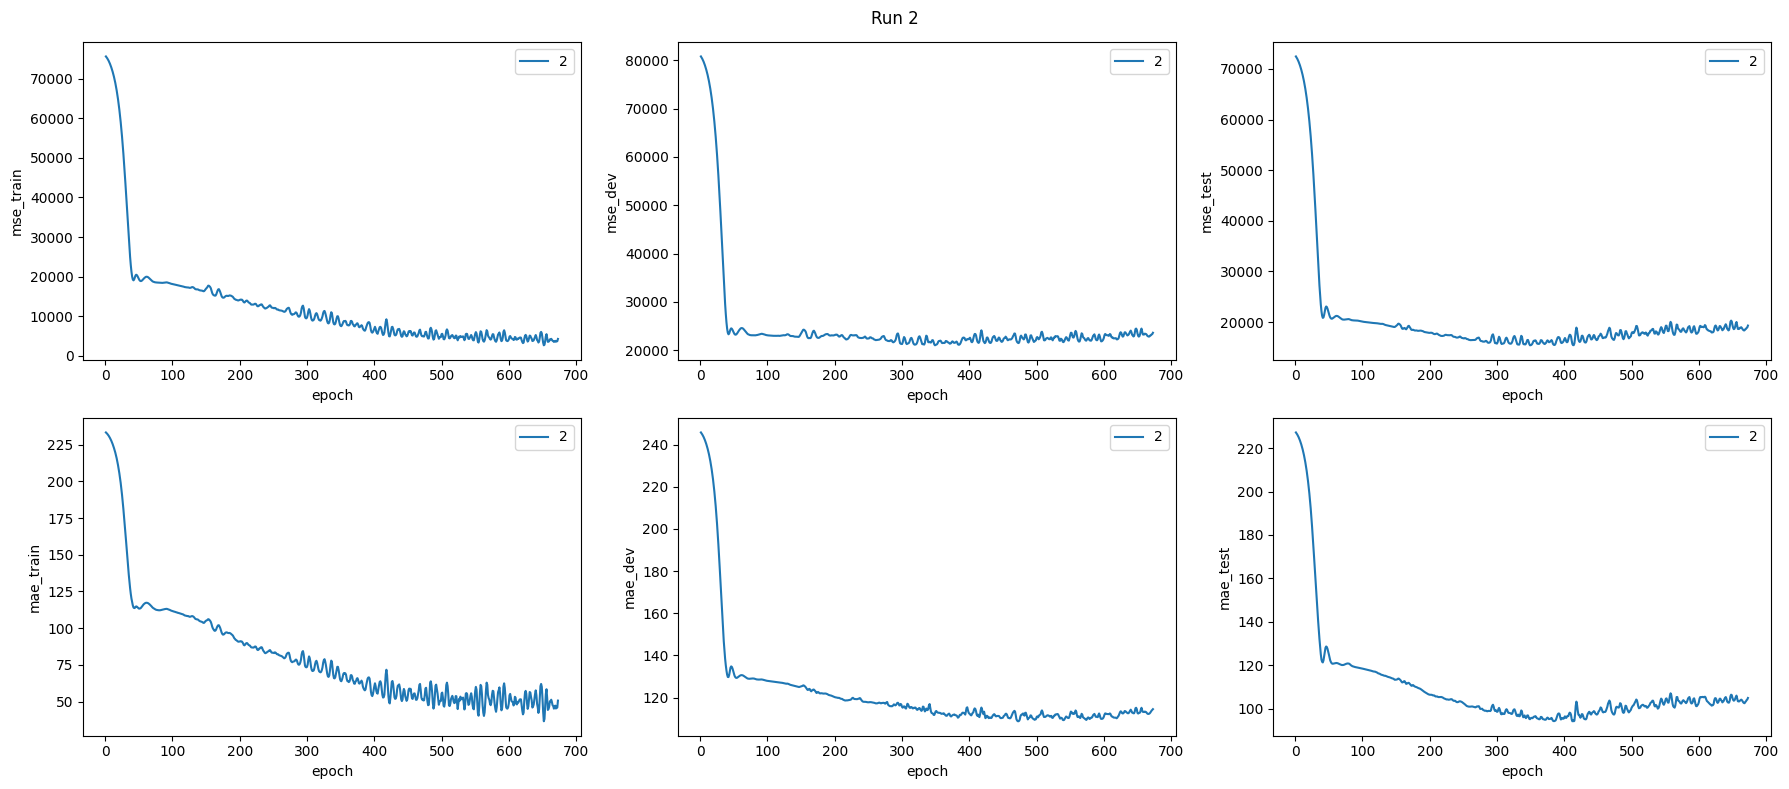

In [48]:
#All_detail runs

for i in range(len(vector_data)):

    if selected_indexes != []:
        if i+1 not in selected_indexes:
            continue
        
    figure2, ax2 = plt.subplots(2, 3, figsize=(18, 8))
    
    figure2.suptitle("Run " + str(i+1))

    sns.lineplot(data=vector_data[i], x="epoch", y="mse_train", ax=ax2[0, 0], label=i+1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mse_dev", ax=ax2[0, 1], label=i+1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mse_test", ax=ax2[0, 2], label=i+1)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mae_train", ax=ax2[1, 0], label=i+1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mae_dev", ax=ax2[1, 1], label=i+1)
    sns.lineplot(data=vector_data[i], x="epoch", y="mae_test", ax=ax2[1, 2], label=i+1)
    
    #ax2[1, 1].set_ylim(50, 80)
    #ax2[1, 2].set_ylim(50, 80)


    figure2.tight_layout()
    plt.show()
    

